PROJECT 1 - GENDER DETECTION

Proyek ini bertujuan untuk mengembangkan sistem pengenalan gender menggunakan teknologi kecerdasan buatan (AI). Pengenalan gender dari wajah merupakan sebuah tantangan yang menarik dalam bidang pengolahan citra dan pembelajaran mesin. Tujuan utama dari proyek ini adalah untuk mengembangkan model AI yang dapat mengenali gender seseorang berdasarkan gambar wajah.

CelebA (Celebrity Faces Attributes) dataset adalah kumpulan data gambar wajah selebriti yang sangat populer dalam pengolahan citra dan pembelajaran mesin. Terdiri dari 200 ribu gambar wajah dari lebih dari 10 ribu selebriti yang berbeda, termasuk aktor, aktris, penyanyi, atlet, dan tokoh publik lainnya. Setiap gambar pada dataset memiliki label atribut, seperti jenis kelamin, umur, warna rambut, dan sebagainya, yang memungkinkan untuk melakukan pelatihan model untuk mempelajari karakteristik wajah manusia sehingga sangat berguna dalam pengembangan teknologi pengenalan wajah. https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

In [ ]:
import os
import gdown
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras_tuner as kt
import base64
import matplotlib.image as mpimg
import plotly.express as px
import random

from tensorflow.python.keras.models import Input
from tensorflow.keras.models import Sequential
from keras.models import load_model
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import image_dataset_from_directory
from keras.layers import Flatten, Dense, Dropout, Conv2D, BatchNormalization, ReLU, AveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
from io import BytesIO
from scikeras.wrappers import KerasClassifier
from keras.applications import InceptionResNetV2

In [2]:
# Displaying list attribute
attribute_list_df = pd.read_csv('Dataset/list_attribute.txt')
attribute_list_df

202599
0       5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1       000001.jpg -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1...
2       000002.jpg -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1...
3       000003.jpg -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1...
4       000004.jpg -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
...                                                   ...
202595  202595.jpg -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1...
202596  202596.jpg -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1...
202597  202597.jpg -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1...
202598  202598.jpg -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1...
202599  202599.jpg -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1...

[202600 rows x 1 columns]

In [3]:
# Displaying class_identity.txt
class_id_df = pd.read_csv('Dataset/class_identity.txt', names=['id_img','number'])
class_id_df

id_img  number
0        000001.jpg 2880     NaN
1        000002.jpg 2937     NaN
2        000003.jpg 8692     NaN
3        000004.jpg 5805     NaN
4        000005.jpg 9295     NaN
...                  ...     ...
202594   202595.jpg 9761     NaN
202595   202596.jpg 7192     NaN
202596   202597.jpg 9852     NaN
202597   202598.jpg 5570     NaN
202598  202599.jpg 10101     NaN

[202599 rows x 2 columns]

In [4]:
#After checking 3 files (gender_classification, class_id_and list_atrribute) final we ONLY use list_attribute because that datta already completed. But there is no coloum field in 000001.jpg, so i write new file txt and add Img_id for first coloum in list_attribut2.txt.
df_attr = pd.read_csv('Dataset/list_attribute.txt', sep="\s+", skiprows=1)
df_attr

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   
...                      ...              ...         ...              ...   
202595.jpg                -1               -1           1               -1   
202596.jpg                -1               -1          -1               -1   
202597.jpg                -1               -1          -1               -1   
202598.jpg                -1                1           1               -1   
202599.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
000001.jpg    -1     -1        -1        -1          -1          -1  ...   
000002.jpg    -1     -1        -1         1          -1          -1  ...   
000003.jpg    -1     -1         1        -1          -1          -1  ...   
000004.jpg    -1     -1        -1        -1          -1          -1  ...   
000005.jpg    -1     -1         1        -1          -1          -1  ...   
...          ...    ...       ...       ...         ...         ...  ...   
202595.jpg    -1     -1         1        -1          -1           1  ...   
202596.jpg    -1      1         1        -1          -1           1  ...   
202597.jpg    -1     -1        -1        -1           1          -1  ...   
202598.jpg    -1     -1         1        -1           1          -1  ...   
202599.jpg    -1     -1        -1        -1          -1           1  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
000001.jpg         -1        1              1         -1                 1   
000002.jpg         -1        1             -1         -1                -1   
000003.jpg         -1       -1             -1          1                -1   
000004.jpg         -1       -1              1         -1                 1   
000005.jpg         -1       -1             -1         -1                -1   
...               ...      ...            ...        ...               ...   
202595.jpg         -1       -1             -1         -1                -1   
202596.jpg         -1        1              1         -1                -1   
202597.jpg         -1        1             -1         -1                -1   
202598.jpg         -1        1             -1          1                 1   
202599.jpg         -1       -1             -1          1                -1   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
000001.jpg           -1                 1                -1               -1   
000002.jpg           -1                -1                -1               -1   
000003.jpg           -1                -1                -1               -1   
000004.jpg           -1                 1                 1               -1   
000005.jpg           -1                 1                -1               -1   
...                 ...               ...               ...              ...   
202595.jpg           -1                 1                -1               -1   
202596.jpg           -1                -1                -1               -1   
202597.jpg           -1                -1                -1               -1   
202598.jpg           -1                 1                -1               -1   
202599.jpg           -1                 1                -1               -1   

            Young  
000001.jpg      1  
000002.jpg      1  
000003.jpg      1  
000004.jpg      1  
000005.jpg      1  
...           ...  
202595.jpg      1  
202596.jpg      1  
202597.jpg      1  
202598.jpg      1  
202599.jpg      1  

[202599 rows x 40 colum

In [5]:
#Open list_attribut2.tx
df_attr2 = pd.read_csv('Dataset/list_attribute2.txt', sep="\s+", skiprows=1)
df_attr2

Img_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                    -1    -1     -1        -1        -1          -1  ...   
1                     1    -1     -1        -1         1          -1  ...   
2                    -1    -1     -1         1        -1          -1  ...   
3                    -1    -1     -1        -1        -1          -1  ...   
4                    -1    -1     -1         1        -1          -1  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594               -1    -1     -1         1        -1          -1  ...   
202595               -1    -1      1         1        -1          -1  ...   
202596               -1    -1     -1        -1        -1           1  ...   
202597               -1    -1     -1         1        -1           1  ...   
202598               -1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0              -1        1              1         -1                 1   
1              -1        1             -1         -1                -1   
2              -1       -1             -1          1                -1   
3              -1       -1              1         -1                 1   
4              -1       -1             -1         -1                -1   
...           ...      ...            ...        ...               ...   
202594         -1       -1             -1         -1                -1   
202595         -1        1              1         -1                -1   
202596         -1        1             -1         -1                -1   
202597         -1        1             -1          1                 1   
202598         -1       -1             -1          1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                -1                 1                -1               -1   
1                -1                -1                -1               -1   
2                -1                -1                -1               -1   
3                -1                 1                 1               -1   
4                -1                 1                -1               -1   
...             ...               ...               ...              ...   
202594           -1                 1                -1               -1   
202595           -1                -1                -1               -1   
202596           -1                -1                -1               -1   
202597           -1                 1                -1               -1   
202598           -1                 1                -1               -1   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [6]:
#How many row and coloum
df_attr2.shape

(202599, 41)

In [7]:
print("Tipe data df:\n", df_attr2.dtypes)

Tipe data df:
 Img_id                 object
5_o_Clock_Shadow        int64
Arched_Eyebrows         int64
Attractive              int64
Bags_Under_Eyes         int64
Bald                    int64
Bangs                   int64
Big_Lips                int64
Big_Nose                int64
Black_Hair              int64
Blond_Hair              int64
Blurry                  int64
Brown_Hair              int64
Bushy_Eyebrows          int64
Chubby                  int64
Double_Chin             int64
Eyeglasses              int64
Goatee                  int64
Gray_Hair               int64
Heavy_Makeup            int64
High_Cheekbones         int64
Male                    int64
Mouth_Slightly_Open     int64
Mustache                int64
Narrow_Eyes             int64
No_Beard                int64
Oval_Face               int64
Pale_Skin               int64
Pointy_Nose             int64
Receding_Hairline       int64
Rosy_Cheeks             int64
Sideburns               int64
Smiling                 i

In [8]:
# List of available attributes
for i, j in enumerate(df_attr2.columns):
    print(i, j)

0 Img_id
1 5_o_Clock_Shadow
2 Arched_Eyebrows
3 Attractive
4 Bags_Under_Eyes
5 Bald
6 Bangs
7 Big_Lips
8 Big_Nose
9 Black_Hair
10 Blond_Hair
11 Blurry
12 Brown_Hair
13 Bushy_Eyebrows
14 Chubby
15 Double_Chin
16 Eyeglasses
17 Goatee
18 Gray_Hair
19 Heavy_Makeup
20 High_Cheekbones
21 Male
22 Mouth_Slightly_Open
23 Mustache
24 Narrow_Eyes
25 No_Beard
26 Oval_Face
27 Pale_Skin
28 Pointy_Nose
29 Receding_Hairline
30 Rosy_Cheeks
31 Sideburns
32 Smiling
33 Straight_Hair
34 Wavy_Hair
35 Wearing_Earrings
36 Wearing_Hat
37 Wearing_Lipstick
38 Wearing_Necklace
39 Wearing_Necktie
40 Young


In [9]:
#checking null values, count & disaply sum for every columns. (no null values identified)
df_attr2.isnull().sum()

Img_id                 0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0


In [10]:
# Setting 'Image_id' column as Index
df_attr2.set_index('Img_id', inplace = True)

In [11]:
#Change data type to int
df_attr2 = df_attr2.astype(int)
#Replace -1 to 0
df_attr2.replace(to_replace = -1, value = 0, inplace = True)
df_attr2.head()

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
Img_id                                                                       
000001.jpg                 0                1           1                0   
000002.jpg                 0                0           0                1   
000003.jpg                 0                0           0                0   
000004.jpg                 0                0           1                0   
000005.jpg                 0                1           1                0   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
Img_id                                                               ...   
000001.jpg     0      0         0         0           0           0  ...   
000002.jpg     0      0         0         1           0           0  ...   
000003.jpg     0      0         1         0           0           0  ...   
000004.jpg     0      0         0         0           0           0  ...   
000005.jpg     0      0         1         0           0           0  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
Img_id                                                                       
000001.jpg          0        1              1          0                 1   
000002.jpg          0        1              0          0                 0   
000003.jpg          0        0              0          1                 0   
000004.jpg          0        0              1          0                 1   
000005.jpg          0        0              0          0                 0   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
Img_id                                                                         
000001.jpg            0                 1                 0                0   
000002.jpg            0                 0                 0                0   
000003.jpg            0                 0                 0                0   
000004.jpg            0                 1                 1                0   
000005.jpg            0                 1                 0                0   

            Young  
Img_id             
000001.jpg      1  
000002.jpg      1  
000003.jpg      1  
000004.jpg      1  
000005.jpg      1  

[5 rows x 40 columns]

In [12]:
# Creating 'gender' dataframe
gender = df_attr2[['Male']]
gender.head(10)

Male
Img_id          
000001.jpg     0
000002.jpg     0
000003.jpg     1
000004.jpg     0
000005.jpg     0
000006.jpg     0
000007.jpg     1
000008.jpg     1
000009.jpg     0
000010.jpg     0

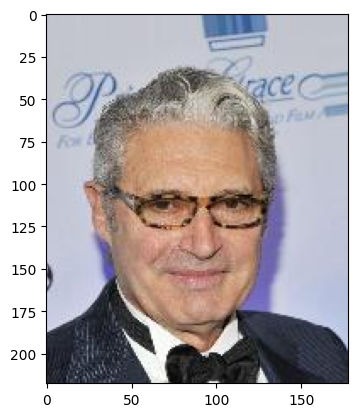

Male    1
Name: 000444.jpg, dtype: int32

In [13]:
# Displaying picture and 'Male' column label, check image randomly
picture = 'Dataset/Images/000444.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
gender.loc[picture.split('/')[-1]][['Male']]

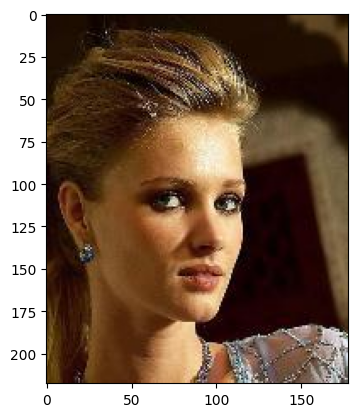

Male    0
Name: 002663.jpg, dtype: int32

In [14]:
# Displaying picture and 'Male' column label, check image randomly
picture = 'Dataset/Images/002663.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
gender.loc[picture.split('/')[-1]][['Male']]

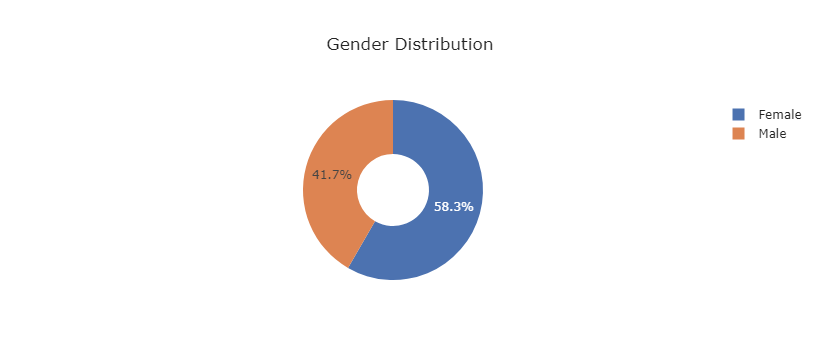

In [15]:
# Plotting gender distribution pie plot
labels = {1:'Male', 0:'Female'} # Assigning 'Male' value for 1 and 'Female' value for 0
value_counts = gender['Male'].value_counts()
values = pd.DataFrame({'Male': value_counts.index, 'count': value_counts.values})
values['Male'] = values['Male'].map(labels)
fig = px.pie(values, values = 'count', names = 'Male', template = 'seaborn',
            title = 'Gender Distribution')
fig.update_traces(hole = .4)
fig.show()

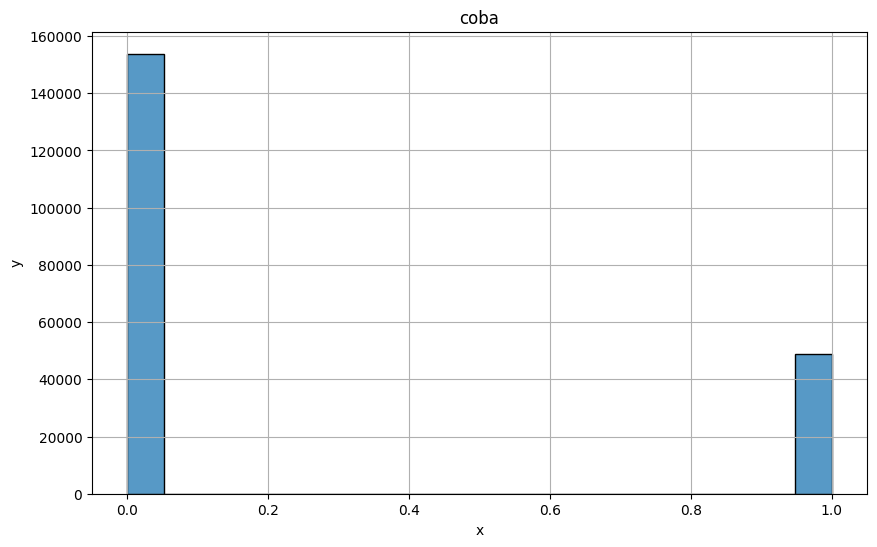

In [16]:
#checking for the data distribution type to identity impute method for missing values.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_attr2, x='Big_Lips')
plt.title('coba')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [17]:
corelation_format = df_attr2.corr()
print(corelation_format.corr())

                     5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
5_o_Clock_Shadow             1.000000        -0.570693   -0.441577   
Arched_Eyebrows             -0.570693         1.000000    0.678454   
Attractive                  -0.441577         0.678454    1.000000   
Bags_Under_Eyes              0.488346        -0.522440   -0.639969   
Bald                         0.216986        -0.413454   -0.546183   
Bangs                       -0.353112         0.219675    0.328310   
Big_Lips                    -0.245062         0.502911    0.264444   
Big_Nose                     0.490390        -0.553361   -0.762883   
Black_Hair                   0.303949        -0.136917   -0.093327   
Blond_Hair                  -0.514975         0.510162    0.523984   
Blurry                       0.037295        -0.240074   -0.350565   
Brown_Hair                  -0.178951         0.209840    0.381719   
Bushy_Eyebrows               0.562902        -0.308996   -0.193180   
Chubby              

In [18]:
df_attr2.reset_index(drop=False, inplace=True)
df_attr2.head()

Img_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                 0                1           1                0   
1  000002.jpg                 0                0           0                1   
2  000003.jpg                 0                0           0                0   
3  000004.jpg                 0                0           1                0   
4  000005.jpg                 0                1           1                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0     0      0         0         0           0  ...          0        1   
1     0      0         0         1           0  ...          0        1   
2     0      0         1         0           0  ...          0        0   
3     0      0         0         0           0  ...          0        0   
4     0      0         1         0           0  ...          0        0   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1          0                 1            0                 1   
1              0          0                 0            0                 0   
2              0          1                 0            0                 0   
3              1          0                 1            0                 1   
4              0          0                 0            0                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                 0                0      1  
1                 0                0      1  
2                 0                0      1  
3                 1                0      1  
4                 0                0      1  

[5 rows x 41 columns]

In [19]:
print(df_attr2.columns)

Index(['Img_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')


In [20]:
#alternatif ngapus kolom #columns_to_remove = ['column1', 'column2', 'column3']  # List of columns you want to remove
#df_attr2.drop(columns=columns_to_remove, inplace=True)

gender_df=df_attr2[['Img_id','Male']]
gender_df

Img_id  Male
0       000001.jpg     0
1       000002.jpg     0
2       000003.jpg     1
3       000004.jpg     0
4       000005.jpg     0
...            ...   ...
202594  202595.jpg     0
202595  202596.jpg     1
202596  202597.jpg     1
202597  202598.jpg     0
202598  202599.jpg     0

[202599 rows x 2 columns]

In [21]:
#Focus on Male Coloum
gender_df.rename(columns={"Male": "Gender"}, inplace=True)
gender_df

C:\Users\daniel\AppData\Local\Temp\ipykernel_13700\2977974273.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Img_id  Gender
0       000001.jpg       0
1       000002.jpg       0
2       000003.jpg       1
3       000004.jpg       0
4       000005.jpg       0
...            ...     ...
202594  202595.jpg       0
202595  202596.jpg       1
202596  202597.jpg       1
202597  202598.jpg       0
202598  202599.jpg       0

[202599 rows x 2 columns]

In [22]:
#to match the data in the attribute list2 (Img_id) with the photo files in the Images folder, False=doesn't exist, True=exist
images_folder = os.listdir('Dataset/Images')
gender_df['isExist'] = gender_df['Img_id'].isin(images_folder)
gender_df

C:\Users\daniel\AppData\Local\Temp\ipykernel_13700\3279855375.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Img_id  Gender  isExist
0       000001.jpg       0    False
1       000002.jpg       0    False
2       000003.jpg       1    False
3       000004.jpg       0    False
4       000005.jpg       0    False
...            ...     ...      ...
202594  202595.jpg       0    False
202595  202596.jpg       1    False
202596  202597.jpg       1    False
202597  202598.jpg       0    False
202598  202599.jpg       0    False

[202599 rows x 3 columns]

In [23]:
gender_df.drop(gender_df[gender_df['isExist'] == False].index, inplace=True)
gender_df

C:\Users\daniel\AppData\Local\Temp\ipykernel_13700\1138045391.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Img_id  Gender  isExist
50      000051.jpg       1     True
51      000052.jpg       1     True
64      000065.jpg       1     True
165     000166.jpg       1     True
197     000198.jpg       0     True
...            ...     ...      ...
202319  202320.jpg       0     True
202339  202340.jpg       0     True
202346  202347.jpg       0     True
202356  202357.jpg       0     True
202565  202566.jpg       1     True

[5000 rows x 3 columns]

In [24]:
gender_df.reset_index(drop=True, inplace=True)
gender_df

Img_id  Gender  isExist
0     000051.jpg       1     True
1     000052.jpg       1     True
2     000065.jpg       1     True
3     000166.jpg       1     True
4     000198.jpg       0     True
...          ...     ...      ...
4995  202320.jpg       0     True
4996  202340.jpg       0     True
4997  202347.jpg       0     True
4998  202357.jpg       0     True
4999  202566.jpg       1     True

[5000 rows x 3 columns]

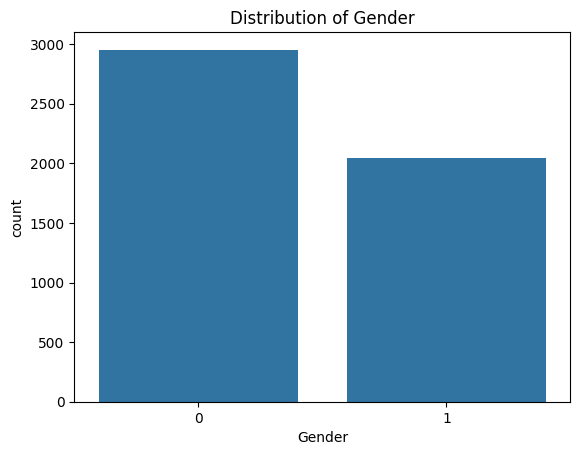

In [25]:
sns.countplot(x='Gender', data=gender_df)
plt.title('Distribution of Gender')
plt.show()

In [26]:
images_path = 'Dataset/Images'
splitted_folder = 'Dataset/Splitted'
train_folder = os.path.join(splitted_folder, 'Dataset/Splitted/Training')
validation_folder = os.path.join(splitted_folder, 'Dataset/Splitted/Validation')
test_folder = os.path.join(splitted_folder, 'Dataset/Splitted/Testing')

In [27]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [28]:
#cek distribusi jumlah Male and Female di folder training
#FEMALE
folder_path_train_F = "Dataset/Splitted/Dataset/Splitted/Training/Female"
# List semua file di dalam folder
files = os.listdir(folder_path_train_F)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_F}: {num_files}")

#MALE
folder_path_train_M = "Dataset/Splitted/Dataset/Splitted/Training/Male"
# List semua file di dalam folder
files = os.listdir(folder_path_train_M)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_M}: {num_files}")

Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Training/Female: 2346
Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Training/Male: 1654


In [29]:
#cek distribusi jumlah Male and Female di folder testing
#FEMALE
folder_path_train_F = "Dataset/Splitted/Dataset/Splitted/Testing/Female"
# List semua file di dalam folder
files = os.listdir(folder_path_train_F)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_F}: {num_files}")

#MALE
folder_path_train_M = "Dataset/Splitted/Dataset/Splitted/Testing/Male"
# List semua file di dalam folder
files = os.listdir(folder_path_train_M)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_M}: {num_files}")

Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Testing/Female: 296
Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Testing/Male: 204


In [30]:
#cek distribusi jumlah Male and Female di folder validation
#FEMALE
folder_path_train_F = "Dataset/Splitted/Dataset/Splitted/Validation/Female"
# List semua file di dalam folder
files = os.listdir(folder_path_train_F)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_F}: {num_files}")

#MALE
folder_path_train_M = "Dataset/Splitted/Dataset/Splitted/Validation/Male"
# List semua file di dalam folder
files = os.listdir(folder_path_train_M)
# Hitung jumlah file
num_files = len(files)
print(f"Jumlah file di folder {folder_path_train_M}: {num_files}")

Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Validation/Female: 311
Jumlah file di folder Dataset/Splitted/Dataset/Splitted/Validation/Male: 189


In [31]:
image_size=(178, 218);
batch_size=32;

In [32]:
train_datasets = image_dataset_from_directory(
    directory=train_folder,
    seed=random.randint(1, 1000),
    class_names=os.listdir(train_folder),
    image_size=image_size,
    batch_size=batch_size
)

Found 4000 files belonging to 2 classes.


In [33]:
train_data_batches = [(data.numpy(), labels.numpy()) for data, labels in train_datasets]
train_data, train_labels = zip(*train_data_batches)
train_data = np.vstack(train_data)
train_labels = np.hstack(train_labels)

In [34]:
validation_datasets = image_dataset_from_directory(
    directory=validation_folder,
    seed=random.randint(1, 1000),
    class_names=os.listdir(validation_folder),
    image_size=image_size,
    batch_size=batch_size
)

Found 500 files belonging to 2 classes.


In [35]:
validation_data_batches = [(data.numpy(), labels.numpy()) for data, labels in validation_datasets]
validation_data, validation_labels = zip(*validation_data_batches)
validation_data = np.vstack(validation_data)
validation_labels = np.hstack(validation_labels)

In [36]:
test_datasets = image_dataset_from_directory(
    directory=test_folder,
    seed=random.randint(1, 1000),
    class_names=os.listdir(test_folder),
    image_size=image_size,
    batch_size=batch_size
)

Found 500 files belonging to 2 classes.


In [37]:
test_data_batches = [(data.numpy(), labels.numpy()) for data, labels in test_datasets]
test_data, test_labels = zip(*test_data_batches)
test_data = np.vstack(test_data)
test_labels = np.hstack(test_labels)

In [38]:
def build_InceptionResNetV2(hp):
    input_shape = (178, 218, 3)
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)

    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=5, step=1)
    for i in range(num_hidden_layers):
        num_units = hp.Choice(f'num_units_{i}', values=[128, 256, 512])
        dropout_rate = hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.9, step=0.1)

        x = Dense(num_units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-5, 1e-4, 1e-3, 3e-3, 1e-2, 3e-2, 0.1, 0.3])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [39]:
epochs = 50
hp_opz = ['hyperband', 'RandomSearch', 'BayesianOptimization']

In [41]:
from tensorflow.keras.models import Model

In [42]:
hyperband_tuner = kt.Hyperband(
    build_InceptionResNetV2,
    objective='val_accuracy',
    max_epochs=epochs,
    factor=3,
    seed=42,
    directory='tuner',
    project_name=str(hp_opz[0])
)

In [43]:
best_hyperband_param = {}
hyperband_tuner.search(train_datasets, validation_data=(validation_datasets), epochs=epochs, batch_size=batch_size, shuffle=True)

hyperband_results = hyperband_tuner.results_summary()

Trial 90 Complete [00h 13m 07s]
val_accuracy: 0.6240000128746033

Best val_accuracy So Far: 0.6299999952316284
Total elapsed time: 04h 34m 31s
Results summary
Results in tuner\hyperband
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0050 summary
Hyperparameters:
num_hidden_layers: 1
num_units_0: 256
dropout_rate_0: 0.9
optimizer: rmsprop
learning_rate: 0.1
num_units_1: 256
dropout_rate_1: 0.2
num_units_2: 256
dropout_rate_2: 0.4
num_units_3: 128
dropout_rate_3: 0.6
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0049
num_units_4: 256
dropout_rate_4: 0.6
Score: 0.6299999952316284

Trial 0049 summary
Hyperparameters:
num_hidden_layers: 1
num_units_0: 256
dropout_rate_0: 0.9
optimizer: rmsprop
learning_rate: 0.1
num_units_1: 256
dropout_rate_1: 0.2
num_units_2: 256
dropout_rate_2: 0.4
num_units_3: 128
dropout_rate_3: 0.6
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
num_u

In [44]:
best_hyperband_param = hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]

cp = ModelCheckpoint('V2-with-{}-Optimization.h5'.format(hp_opz[0]), monitor='val_loss', save_best_only=True,
                     save_weights_only=False, mode='auto', save_freq='epoch', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

best_hyperband_model = hyperband_tuner.hypermodel.build(best_hyperband_param)
best_hyperband_model = best_hyperband_model.fit(train_datasets, validation_data=(test_datasets), epochs=epochs,
                                                batch_size=batch_size, callbacks=[cp, early_stopping], shuffle=True)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 48.2200 - accuracy: 0.5792
Epoch 1: val_loss improved from inf to 0.68225, saving model to V2-with-hyperband-Optimization.h5
125/125 [==============================] - 26s 146ms/step - loss: 48.2200 - accuracy: 0.5792 - val_loss: 0.6823 - val_accuracy: 0.5940
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 1.9550 - accuracy: 0.5860
Epoch 2: val_loss improved from 0.68225 to 0.68084, saving model to V2-with-hyperband-Optimization.h5
125/125 [==============================] - 16s 128ms/step - loss: 1.9550 - accuracy: 0.5860 - val_loss: 0.6808 - val_accuracy: 0.5940
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 1.6876 - accuracy: 0.5880
Epoch 3: val_loss improved from 0.68084 to 0.67826, saving model to V2-with-hyperband-Optimization.h5
125/125 [==============================] - 16s 127ms/step - loss: 1.6876 - accuracy: 0.5880 - val_loss: 0.6783 - val_accuracy: 0.5920
Epoch 

In [45]:
randomsearch_tuner = kt.RandomSearch(
    build_InceptionResNetV2,
    objective='val_accuracy',
    max_trials=10,
    seed=42,
    executions_per_trial=1,
    directory='tuner',
    project_name=str(hp_opz[1])
)

In [47]:
#Evaluation Hyperband
V2_hyperband = load_model('V2-with-hyperband-Optimization.h5')

loss, accuracy = V2_hyperband.evaluate(test_datasets)
print(f'V2 with Hyperband Tuning model loss: {loss}, accuracy: {accuracy}')

16/16 [==============================] - 4s 100ms/step - loss: 0.6755 - accuracy: 0.5920
V2 with Hyperband Tuning model loss: 0.6755264401435852, accuracy: 0.5920000076293945


16/16 [==============================] - 4s 102ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       296
           1       0.50      0.00      0.01       204

    accuracy                           0.59       500
   macro avg       0.55      0.50      0.38       500
weighted avg       0.55      0.59      0.44       500



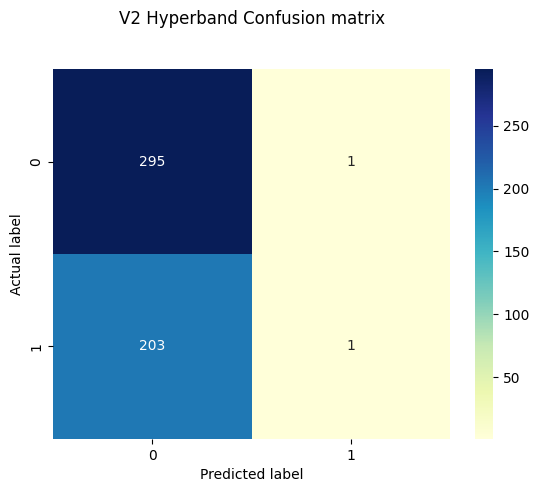

In [48]:
#Hyperband
V2_hyperband_prediction = V2_hyperband.predict(test_data)
cnf_matrix = confusion_matrix(test_labels, np.round(V2_hyperband_prediction))

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('V2 Hyperband Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(test_labels, np.round(V2_hyperband_prediction)))